In [1]:
# Torch imports
from torch.utils.data import DataLoader

# Custom imports
import torch
import heuristics
from dataset_utils import PathPlanningDataset
from display import Displayer
from astar_refactored import Astar
from custom_types import onehottensor2node2d, nodelist2otensor
from training_module import NeuralAstarTrainingModule
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning import Trainer

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
initial_dataset = PathPlanningDataset(
    "/workspaces/neural-Astar/datasets/raw/street",
    16,
    1,
    heuristics.euclidian,
    randomize_points=False,
    max_astar_iterations=10000,
)

dataloader = DataLoader(initial_dataset, 1, False)

checkpoint_callback = ModelCheckpoint(
    monitor="metrics/h_mean", save_weights_only=True, mode="max"
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:67: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
/opt/conda/lib/python3.11/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params
--------------------------------------
0 | astar | NeuralAstar | 15.9 M
--------------------------------------
15.9 M

CONFIGURING OPTIMIZERS
Epoch 0:   0%|          | 0/90 [00:00<?, ?it/s] 

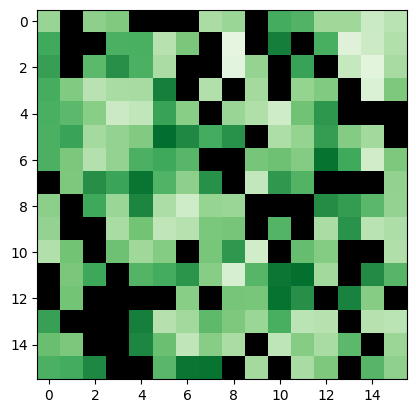

tensor([[15,  7]])
tensor([[4, 0]])
3
4


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [3]:
training_module = NeuralAstarTrainingModule()
trainer = Trainer(
    accelerator="gpu" if torch.cuda.is_available() else "cpu",
    log_every_n_steps=1,
    default_root_dir=".",
    max_epochs=100,
    callbacks=[checkpoint_callback],
)

trainer.fit(training_module, dataloader)